# Homework 3
### Due: Thursday Feb. 27

#### Numerical Derivative VS Known Derivative

Consider the function $ 1 + \frac{1}{2} + tanh(2x)$. You should be able to write the derivative without much effort (if not feel free to google it, remember hyperbolic trig functions behave similarly to their traditional counterparts when differentiating).

Calculate the derivative of this function in the range $-2 \le x \le 2$ using the central difference method. Choose your own (**suitable**) spacing. Plot your computed derivative as points and use a line to plot the analytic solution through the same points. How accurate is your computed derivative?

(20 points)

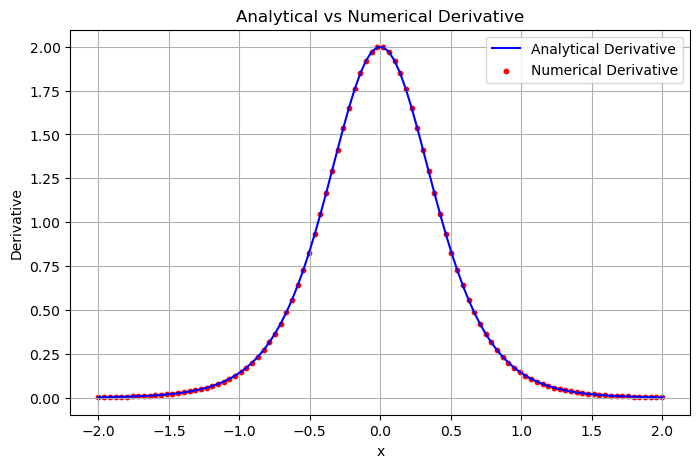

Error: 5.076319603811842e-05


In [1]:
# code

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1 + 12 + np.tanh(2*x)  # Given function

def analytical_derivative(x):
    return 2 / np.cosh(2*x)**2    # Derivative of tanh(2x) is 2sech^2(2x), numpy doesn't have sech function so I used the
                                     # identity sech(x) = 1/cosh(x) and rewrote the analytical answer as seen to the left

def central_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)  # Central difference formula

# Define range and step size, 100 steps seems plenty, step sizes of 0.01 lines up with the analytical derivative really well
x_values = np.linspace(-2, 2, 100)
h = 0.01

# Compute numerical and analytical derivatives
numerical_derivative = np.array([central_difference(f, x, h) for x in x_values])
analytical_values = analytical_derivative(x_values)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(x_values, analytical_values, label='Analytical Derivative', color='blue')
plt.scatter(x_values, numerical_derivative, color='red', s=10, label='Numerical Derivative')
plt.xlabel('x')
plt.ylabel("Derivative")
plt.legend()
plt.title("Analytical vs Numerical Derivative")
plt.grid()
plt.show()

# Compute error
error = np.abs(numerical_derivative - analytical_values)
print("Error:", np.mean(error))

**Explanation:** Using a small step sizes and a large number of steps I was able to get a very accurate answer for the derivative using the central difference method. If I increase the step size, I see the error increase drastically. If i decrease the number of steps I see the graph take a less-gaussian shape with harsh edges and curves. I could continue to decrease the error if I make the step size smaller; however, the results using h=0.01 are sufficient and only have an error of about 5e-5.

#### Electric field of a charge distribution

We're all well aware of the endless fun one can have finding analytic solutions to electrostatic problems. But I propose to you that it is even more fun to let the computer do the work! Once you've carefully written the code.

Recall the electric potential at a distance $r$ from a point charge is given by $\phi = q/4 \pi \epsilon_0 r$, and the electric field can be found by $\vec{E} = - \nabla \phi$.

Consider two charges, of $\pm C$, 10 cm apart. Calculate the electric potential on a 1m x 1m plane surrounding the charges, using a grid of points spaced 1 cm apart. Plot the potential. (Note: 1 cm is a starting point, once you plot the potential you may decide you want a more or less dense grid, feel free to choose a grid that looks good. The computation should be fast enough to play around with this parameter.) The easiest way to plot a 2-dimensional array of scalar values is to use the `imshow` function in `matplotlib.pyplot`. The function will accept as its first argument a 2D array and produce a map with somewhat reasonable colors, but you can also pass kwargs for `cmap`, `vmin`, and `vmax`. The documentation will be helpful.

(20 points)

You may find a few points very close to the charges end up being "too close" and the very small distances lead to floating point issues. A normal solution to this type of issue is to use a "softening" parameter, which is a small number that is used as an enforced minimum, i.e. if your calculated number is less than the softening parameter, use the softening parameter instead. 

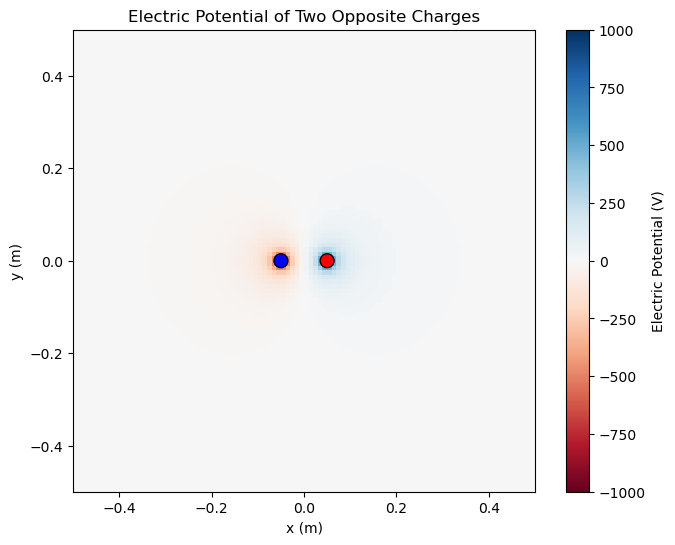

In [2]:
# code

import numpy as np
import matplotlib.pyplot as plt

# Constants
epsilon_0 = 8.854e-12  # Permittivity of free space
C = 1e-9  # Charge magnitude in Coulombs
d = 0.1  # Distance between charges in meters
softening = 1e-3  # Softening parameter to avoid floating point issues

# Grid parameters
grid_size = 1.0  # 1m x 1m plane
dx = 0.01  # Grid spacing (1 cm)
points = int(grid_size / dx)  # Number of points along each axis

# Create grid
x = np.linspace(-0.5, 0.5, points)
y = np.linspace(-0.5, 0.5, points)
X, Y = np.meshgrid(x, y)

# Charge positions
q1_pos = (-d/2, 0)  # Negative charge at (-d/2, 0)
q2_pos = (d/2, 0)   # Positive charge at (d/2, 0)

# Function to calculate potential at each point
def potential(q, pos, X, Y):
    rx = X - pos[0]
    ry = Y - pos[1]
    r = np.sqrt(rx**2 + ry**2 + softening**2)  # Apply softening parameter
    return q / (4 * np.pi * epsilon_0 * r)

# Compute potential field
phi = potential(-C, q1_pos, X, Y) + potential(C, q2_pos, X, Y)

# Plot
plt.figure(figsize=(8, 6))
plt.imshow(phi, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower', cmap='RdBu', vmin=-1e3, vmax=1e3)
plt.colorbar(label='Electric Potential (V)')
plt.scatter([q1_pos[0], q2_pos[0]], [q1_pos[1], q2_pos[1]], c=['blue', 'red'], edgecolors='black', s=100)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Electric Potential of Two Opposite Charges")
plt.show()

Use the electric potential you calculated above to calculate the electric field on the same grid. You may find it convenient to track the x and y components of the electric field in separate 2 dimensional arrays. Recall the instructions in Chapter 5 for computing partial derivatives.

Visualizing this electric field is a bit trickier, since the field has both magnitude and direction. `imshow` may be useful for debugging the x or y components, but visualizing the whole field requires we use both components to plot the field. `matplotlib.pyplot` provides a vfunction called `quiver` that produces a plot of arrows; it accepts as its first two arguments two 2-Dimensional arrays specifying the x and y components of each arrow on the grid.

(30 points)

You will likely have a similar problem as above with "too close" points, but it will be much worse. The magnitude of the electric field very close to the charges may cause your plot to look very bad, almost nonsensical. Limiting the magnitude of your vectors may help. (i.e. if the quadrature sum of the components is too high, reduce the components)

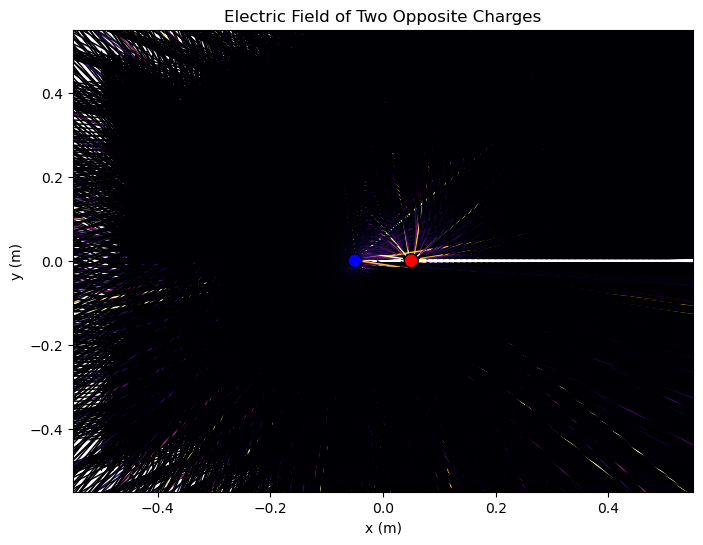

In [3]:
# code

import numpy as np
import matplotlib.pyplot as plt

# Going to start with the same code from above and then modify/add on to calculate electric field

# Constants
epsilon_0 = 8.854e-12  # Permittivity of free space
C = 1e-9  # Charge magnitude in Coulombs
d = 0.1  # Distance between charges in meters
softening = 1e-3  # Softening parameter to avoid singularities

# Grid parameters
grid_size = 1.0  # 1m x 1m plane
dx = 0.01  # Grid spacing (1 cm)
points = int(grid_size / dx)  # Number of points along each axis

# Create grid
x = np.linspace(-0.5, 0.5, points)
y = np.linspace(-0.5, 0.5, points)
X, Y = np.meshgrid(x, y)

# Charge positions
q1_pos = (-d/2, 0)  # Negative charge at (-d/2, 0)
q2_pos = (d/2, 0)   # Positive charge at (d/2, 0)

# Function to calculate potential at each point
def potential(q, pos, X, Y):
    rx = X - pos[0]
    ry = Y - pos[1]
    r = np.sqrt(rx**2 + ry**2 + softening**2)  # Apply softening
    return q / (4 * np.pi * epsilon_0 * r)

# Compute potential field
phi = potential(-C, q1_pos, X, Y) + potential(C, q2_pos, X, Y)

# Compute electric field components
Ey, Ex = np.gradient(-phi, dx, edge_order=2)

# Limit the magnitude of E to avoid excessive vector lengths
E_magnitude = np.sqrt(Ex**2 + Ey**2)
E_max = np.percentile(E_magnitude, 95)  # Limit to 95th percentile
scaling_factor = np.minimum(1, E_max / (E_magnitude + 1e-9))
Ex *= scaling_factor
Ey *= scaling_factor

# Plot electric field
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, Ex, Ey, E_magnitude, cmap='inferno', scale=50)
plt.scatter([q1_pos[0], q2_pos[0]], [q1_pos[1], q2_pos[1]], c=['blue', 'red'], edgecolors='black', s=100)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Electric Field of Two Opposite Charges")
plt.show()


### Solving matrices

Exercises 6.1 in your book shows a network of resistors and suggests a method to solve for V at each point. Write out the full system of equations and then implement the code to solve them using Gaussian elimination. As usual, some code to solve the problem is provided, but you will find it more instructive to first attempt to code the solution yourself. The code is there if you get stuck. As usual I don't want to see identical code in multiple assignments!

(15 points)

Exercise 6.2 is an extension of 6.1. Complete parts a) and b) for (10 points)

Finally, Exercise 6.4 instructs you to verify you get the same answer using [numpy](https://numpy.org/doc/2.1/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve). (5 points)

In [4]:
#code

#6.1

import numpy as np

def gaussian_elimination(A, b):
    n = len(b)
    # Forward elimination
    for i in range(n):
        # Pivoting
        max_row = max(range(i, n), key=lambda r: abs(A[r][i]))
        A[[i, max_row]] = A[[max_row, i]]
        b[[i, max_row]] = b[[max_row, i]]
        
        # Eliminate below
        for j in range(i+1, n):
            factor = A[j][i] / A[i][i]
            A[j] -= factor * A[i]
            b[j] -= factor * b[i]
    
    # Back substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    
    return x

# Define the system of equations for resistor network
V_plus = 5  # Given voltage source
A = np.array([[4, -1, -1, -1],
              [-1, 4, -1, -1],
              [-1, -1, 4, -1],
              [-1, -1, -1, 4]], dtype=float)
b = np.array([V_plus, 0, 0, 0], dtype=float)

# Solve using Gaussian elimination
solution = gaussian_elimination(A.copy(), b.copy())
print("Solution using Gaussian elimination:", solution)


Solution using Gaussian elimination: [2. 1. 1. 1.]


In [5]:
#6.2-a - I am going to modify the code above to implement partial pivoting

import numpy as np

def gaussian_elimination_pivoting(A, b):
    n = len(b)
    for i in range(n):
        # Partial Pivoting: Find max element in column i
        max_row = np.argmax(np.abs(A[i:n, i])) + i
        A[[i, max_row]] = A[[max_row, i]]
        b[[i, max_row]] = b[[max_row, i]]
        
        # Eliminate below
        for j in range(i+1, n):
            factor = A[j][i] / A[i][i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]
    
    # Back substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    
    return x

# Define the system of equations for resistor network
V_plus = 5  # Given voltage source
A = np.array([[4, -1, -1, -1],
              [-1, 4, -1, -1],
              [-1, -1, 4, -1],
              [-1, -1, -1, 4]], dtype=float)
b = np.array([V_plus, 0, 0, 0], dtype=float)

# Solve using Gaussian elimination with pivoting
solution_pivoting = gaussian_elimination_pivoting(A.copy(), b.copy())
print("Solution using Gaussian elimination with pivoting:", solution_pivoting)


Solution using Gaussian elimination with pivoting: [2. 1. 1. 1.]


In [6]:
#6.2-b - use partial pivioting to solve equation 6.17

import numpy as np

# Define the augmented matrix [A|b]
A = np.array([[0, 1, 4, 1],
              [3, 4, -1, -1],
              [1, -4, 1, 5],
              [2, -2, 1, 3]], dtype=float)

b = np.array([-4, 3, 9, 7], dtype=float)

# Gaussian elimination with partial pivoting
n = len(b)

# Perform Gaussian elimination with partial pivoting
for i in range(n):
    # Find the row with the largest pivot element
    max_row = np.argmax(np.abs(A[i:n, i])) + i
    if i != max_row:
        # Swap the rows
        A[[i, max_row]] = A[[max_row, i]]
        b[i], b[max_row] = b[max_row], b[i]

    # Perform elimination on the columns below the pivot
    for j in range(i + 1, n):
        factor = A[j, i] / A[i, i]
        A[j, i:] -= factor * A[i, i:]
        b[j] -= factor * b[i]

# Back substitution
x = np.zeros_like(b)
for i in range(n - 1, -1, -1):
    x[i] = (b[i] - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]

print("Solution:", x)

Solution: [ 1.61904762 -0.42857143 -1.23809524  1.38095238]


In [7]:
#6.4 

import numpy as np

# Define matrix A (coefficients)
A = np.array([[4, -1, -1, -1], 
              [-1, 4, -1, -1], 
              [-1, -1, 4, -1], 
              [-1, -1, -1, 4]])

# Define vector b (right-hand side)
b = np.array([5, 0, 0, 0])

# Solve the system
V = np.linalg.solve(A, b)

# Print the results
print("Voltages at each junction:", V)

Voltages at each junction: [2. 1. 1. 1.]


I can confirm I got the same answers in 6.1, 6.2a, and 6.4, although I wish I could've just used numpy from the start; that method was much more straightforward :)